### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [142]:
data = pd.read_csv('data/coupons.csv')

In [143]:
pd.set_option('display.max_columns', None)
data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

# Check for Duplicates
- Check for duplicates
- Decide what to do with them

In [144]:
#check for duplicates
data.duplicated().sum()

74

In [145]:
#They may be same responses to the survey. So they are likely to be legit. Keep them.
data[data.duplicated()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,0,Associates degree,Unemployed,Less than $12500,NaN,less1,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,0,Graduate degree (Masters or Doctorate),Management,$25000 - $37499,NaN,4~8,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,0,Bachelors degree,Education&Training&Library,$50000 - $62499,NaN,1~3,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,0,Some college - no degree,Protective Service,$25000 - $37499,NaN,1~3,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,0,Bachelors degree,Life Physical Social Science,$37500 - $49999,NaN,less1,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,1,1,0,1,0


# Check for missing values
- Check number of missing values
- Check ratio of missing values as a percentage of total number of rows

In [146]:
#number of missing values for each column
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [147]:
#missing values as a percentage of number of rows
data.isnull().sum()/data.shape[0]*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...

# Clean the Data
- Drop 'car' column as 99% of the data is missing
- Drop rows with missing values in 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20' and 'Restaurant20to50', as missing values make up less than 2% of the data
- Convert certain columns to numbers to ease the analysis

In [148]:

#drop car column
data_clean = data.drop(columns=['car'])

#drop rows with null columns after the analysis
data_clean = data_clean.dropna()

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

In [149]:
#check if any null values remaining
data_clean.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [150]:
#check for numeric values stored as object
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [151]:
#convert numberic values to a format that is easy to work with

#convert age to numberic. change 50plus to 50 and below21 to 21
data_clean['age'] = data_clean['age'].replace('50plus', 50).replace('below21', 21)
data_clean['age'] = pd.to_numeric(data_clean['age'])

#convert income brackets to numbers representing upper limit of the range
data_clean['income'].replace('Less than $12500', 12500, inplace=True) # represents 12500 or less
data_clean['income'].replace('$12500 - $24999', 25000, inplace=True)
data_clean['income'].replace('$25000 - $37499', 37500, inplace=True)
data_clean['income'].replace('$37500 - $49999', 50000, inplace=True)
data_clean['income'].replace('$50000 - $62499', 62400, inplace=True)
data_clean['income'].replace('$62500 - $74999', 75000, inplace=True)
data_clean['income'].replace('$75000 - $87499', 87500, inplace=True)
data_clean['income'].replace('$87500 - $99999', 100000, inplace=True)
data_clean['income'].replace('$100000 or More', 100001, inplace=True) #represents 100,000 or more

#convert how many times a person visits a bar to represent upper limit of the range
data_clean['Bar'].replace('never', 0, inplace=True)
data_clean['Bar'].replace('less1', 1, inplace=True)
data_clean['Bar'].replace('1~3', 3, inplace=True)
data_clean['Bar'].replace('4~8', 8, inplace=True)
data_clean['Bar'].replace('gt8', 9, inplace=True)

#do the same for CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20to50
data_clean['CoffeeHouse'].replace('never', 0, inplace=True)
data_clean['CoffeeHouse'].replace('less1', 1, inplace=True)
data_clean['CoffeeHouse'].replace('1~3', 3, inplace=True)
data_clean['CoffeeHouse'].replace('4~8', 8, inplace=True)
data_clean['CoffeeHouse'].replace('gt8', 9, inplace=True)

data_clean['CarryAway'].replace('never', 0, inplace=True)
data_clean['CarryAway'].replace('less1', 1, inplace=True)
data_clean['CarryAway'].replace('1~3', 3, inplace=True)
data_clean['CarryAway'].replace('4~8', 8, inplace=True)
data_clean['CarryAway'].replace('gt8', 9, inplace=True)

data_clean['RestaurantLessThan20'].replace('never', 0, inplace=True)
data_clean['RestaurantLessThan20'].replace('less1', 1, inplace=True)
data_clean['RestaurantLessThan20'].replace('1~3', 3, inplace=True)
data_clean['RestaurantLessThan20'].replace('4~8', 8, inplace=True)
data_clean['RestaurantLessThan20'].replace('gt8', 9, inplace=True)

data_clean['Restaurant20To50'].replace('never', 0, inplace=True)
data_clean['Restaurant20To50'].replace('less1', 1, inplace=True)
data_clean['Restaurant20To50'].replace('1~3', 3, inplace=True)
data_clean['Restaurant20To50'].replace('4~8', 8, inplace=True)
data_clean['Restaurant20To50'].replace('gt8', 9, inplace=True)


4. What proportion of the total observations chose to accept the coupon? 



In [152]:
#proportion of total observations that accept the coupon. Please note, the result is based on the cleaned data frame.
data_clean[data_clean['Y'] == 1]['Y'].sum()/data_clean.shape[0]

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

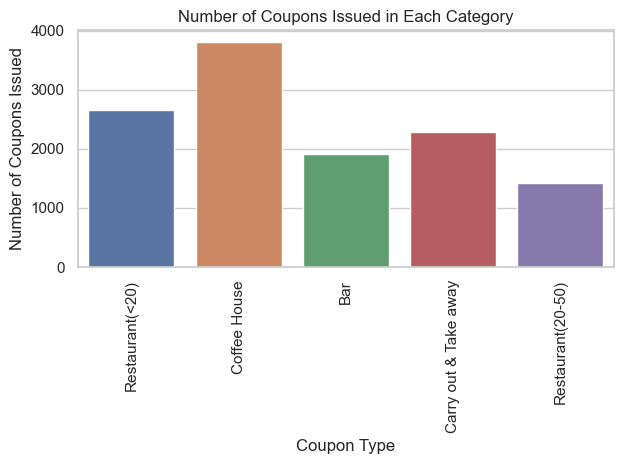

In [153]:
#bar plot of number of coupons issued in each category
sns.set_theme(style="whitegrid")
sns.countplot(data=data_clean, x='coupon').set_title('Number of Coupons Issued in Each Category')
plt.xticks(rotation=90)
plt.xlabel('Coupon Type')
plt.ylabel('Number of Coupons Issued')
plt.tight_layout()
plt.savefig('images/number_of_coupons_issued.png')

In [154]:
#bar plot of percent of coupons accepted in each category
percent_of_coupon = data_clean.groupby('coupon')['Y'].mean()*100
percent_of_coupon = percent_of_coupon.reset_index()

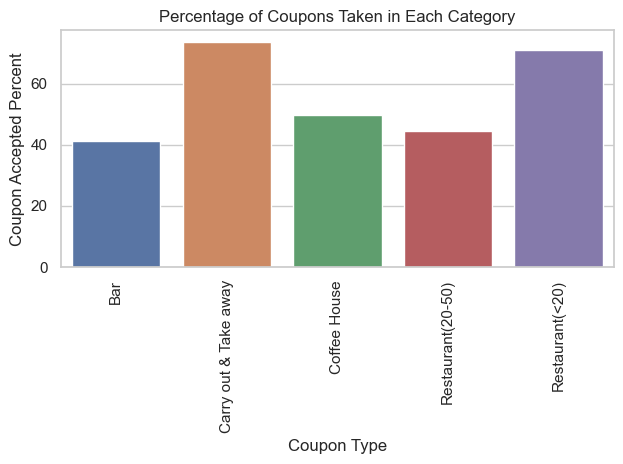

In [155]:
sns.set_theme(style="whitegrid")

sns.barplot(data=percent_of_coupon, x='coupon', y='Y').set_title('Percentage of Coupons Taken in Each Category')
plt.xticks(rotation=90)
plt.xlabel('Coupon Type')
plt.ylabel('Coupon Accepted Percent')
plt.tight_layout()
plt.savefig('images/percent_of_coupons_accepted.png')

6. Use a histogram to visualize the temperature column.

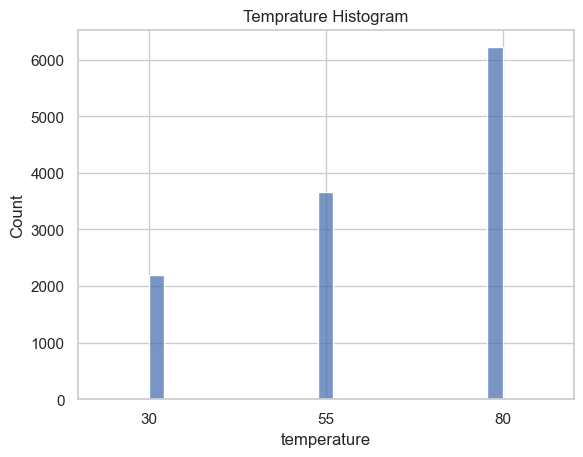

In [156]:
sns.set_theme(style="whitegrid")
sns.histplot(data=data_clean, x='temperature').set_title('Temprature Histogram')
plt.xlim(20, 90)
plt.xticks([30,55,80])
plt.savefig('images/temprature_histogram.png')


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [157]:
#data frame that just contains bar coupons
data_bar = data_clean[data_clean['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [158]:
#proportion of bar coupons accepted
data_bar['Y'].mean()

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [159]:
#create a flag for each row that is set to True if a person is going to bar 3 or fewer times
fewer = np.where(data_bar['Bar']<= 3, True, False)

#insert the flag to the data frame
data_bar.insert(0, '3 or fewer', fewer)

#compute acceptance rate of this group vs. everyone else
data_bar.groupby('3 or fewer')['Y'].mean()

#People going to bar 3 or fewer times has a much lower acceptance rate (37%) than those who go more (76%)

3 or fewer
False    0.761658
True     0.372674
Name: Y, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [160]:
bar_more_than_one_over_25 = np.where((data_bar['Bar']>1) & (data_bar['age']>25), True, False)
data_bar.insert(0, 'bar_more_than_one_over_25', bar_more_than_one_over_25)
data_bar.groupby('bar_more_than_one_over_25')['Y'].mean()

#This group has a higher acceptance rate (69%) vs. all others (34%)

bar_more_than_one_over_25
False    0.337748
True     0.689826
Name: Y, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [161]:
bar_pass_occ = data_bar['Bar']>1 & ~(data_bar['passanger'].isin(['Kid(s)', 'Alone'])) & ~(data_bar['occupation']=='Farming Fishing & Forestry')
data_bar.insert(0, 'bar_pass_occ', bar_pass_occ)
data_bar.groupby('bar_pass_occ')['Y'].mean()

bar_pass_occ
False    0.253886
True     0.572785
Name: Y, dtype: float64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [162]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed
group1 = (data_bar['Bar']>1) & ~(data_bar['passanger'].isin(['Kid(s)', 'Alone'])) & ~(data_bar['maritalStatus']=='Widowed')

#go to bars more than once a month and are under the age of 30
group2 = (data_bar['Bar']>1) & (data_bar['age']<30)

#go to cheap restaurants more than 4 times a month and income is less than 50K
group3 = (data_bar['RestaurantLessThan20']>4) & (data_bar['income']<50000)

data_bar2 = data_bar.copy()

data_bar2.insert(0, 'group1', group1)
data_bar2.insert(0, 'group2', group2)
data_bar2.insert(0, 'group3', group3)
                                                                             
group1_results = data_bar2.groupby('group1')['Y'].mean()
group2_results = data_bar2.groupby('group2')['Y'].mean()
group3_results = data_bar2.groupby('group3')['Y'].mean()

print(group1_results)
print(group2_results)
print(group3_results)



group1
False    0.378770
True     0.714286
Name: Y, dtype: float64
group2
False    0.348265
True     0.719512
Name: Y, dtype: float64
group3
False    0.408383
True     0.436214
Name: Y, dtype: float64


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Summary of findings

- The drivers who visit bars more often every month, are more likely to accept a bar coupon. This is quite natural. This holds true for anyone who's over age 25 as well.

- When drivers do not have a kid in the car, they're more likely to accept the coupon, especially if they're already going more than once a month to a bar and not widowed. 

- A person going to a cheap restaurant more than 4 times and income less than $50k is not a good predictor of acceptance of the coupon.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [163]:
#pick a coupon type that is relatively low in acceptance rate
data_clean.groupby('coupon')['Y'].mean()

#go with Coffee House

coupon
Bar                      0.411918
Carry out & Take away    0.737719
Coffee House             0.496331
Restaurant(20-50)        0.446013
Restaurant(<20)          0.709009
Name: Y, dtype: float64

In [164]:
data_coffee = data_clean[data_clean['coupon'] == 'Coffee House']
data_coffee

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,75000,0,1,8,8,1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,75000,0,1,8,8,1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,75000,0,1,8,8,1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,75000,0,1,8,8,1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,75000,0,1,8,8,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,1,Bachelors degree,Business & Financial,100001,1,0,8,9,1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,1,Bachelors degree,Business & Financial,100001,1,0,8,9,1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,0,Bachelors degree,Sales & Related,87500,0,0,3,8,3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,0,Bachelors degree,Sales & Related,87500,0,0,3,8,3,1,1,0,0,1,0


In [165]:
#avg coupon acceptance rate
data_coffee['Y'].mean()

0.49633123689727465

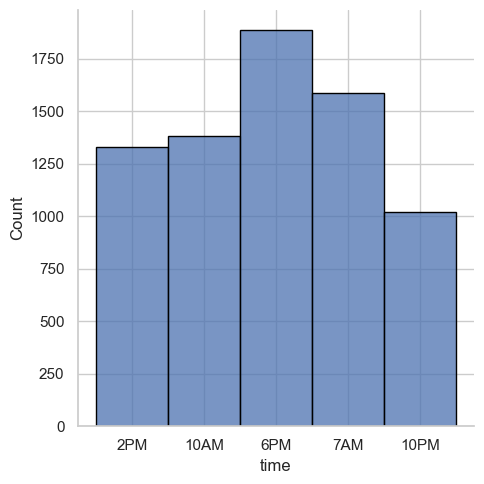

In [166]:
sns.displot(data.query('Y == 1')['time'], edgecolor='black')

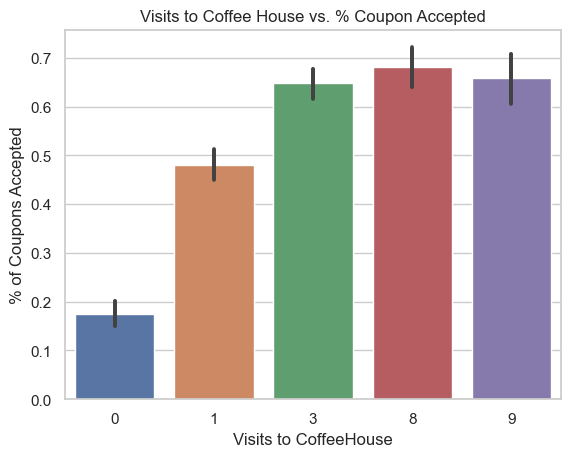

In [167]:
sns.barplot(data=data_coffee, x='CoffeeHouse', y='Y' )

sns.set_theme(style="whitegrid")
sns.barplot(data=data_coffee, x='CoffeeHouse', y='Y' ).set_title('Visits to Coffee House vs. % Coupon Accepted')
plt.xlabel('Visits to CoffeeHouse')
plt.ylabel('% of Coupons Accepted')
plt.savefig('images/coffee_house_coupons_accepted.png')

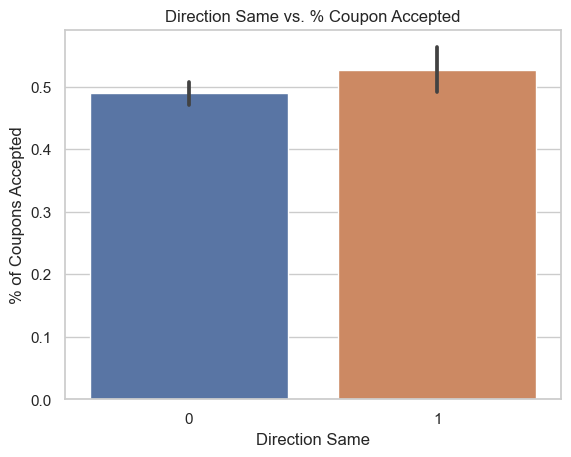

In [168]:
sns.barplot(data=data_coffee, x='direction_same', y='Y' ).set_title('Direction Same vs. % Coupon Accepted')
plt.xlabel('Direction Same')
plt.ylabel('% of Coupons Accepted')
plt.savefig('images/direction_same_coupons_accepted.png')

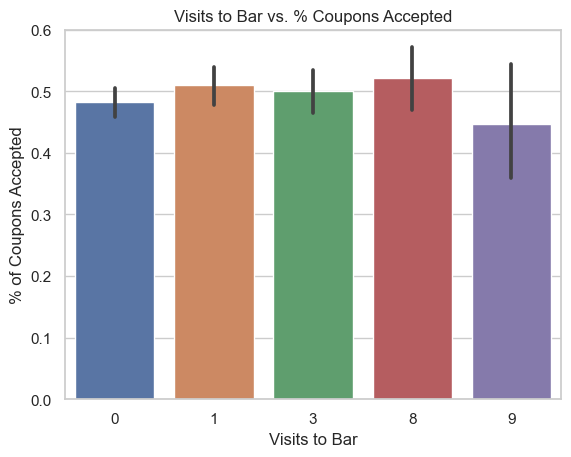

In [169]:
sns.barplot(data=data_coffee, x='Bar', y='Y' ).set_title('Visits to Bar vs. % Coupons Accepted')
plt.xlabel('Visits to Bar')
plt.ylabel('% of Coupons Accepted')
plt.savefig('images/bar_visits_coupons_accepted.png')

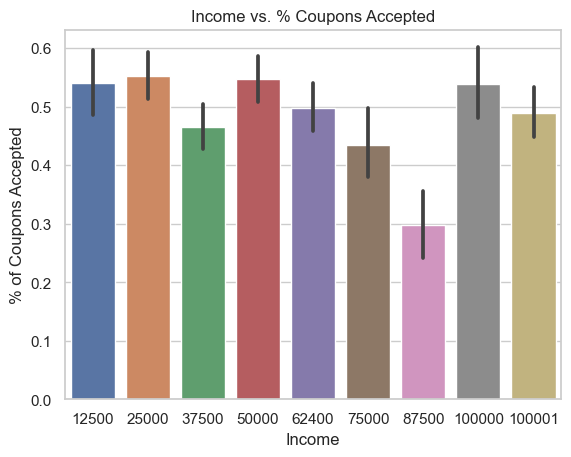

In [170]:
sns.barplot(data=data_coffee, x='income', y='Y' ).set_title('Income vs. % Coupons Accepted')
plt.xlabel('Income')
plt.ylabel('% of Coupons Accepted')
plt.savefig('images/income_coupons_accepted.png')

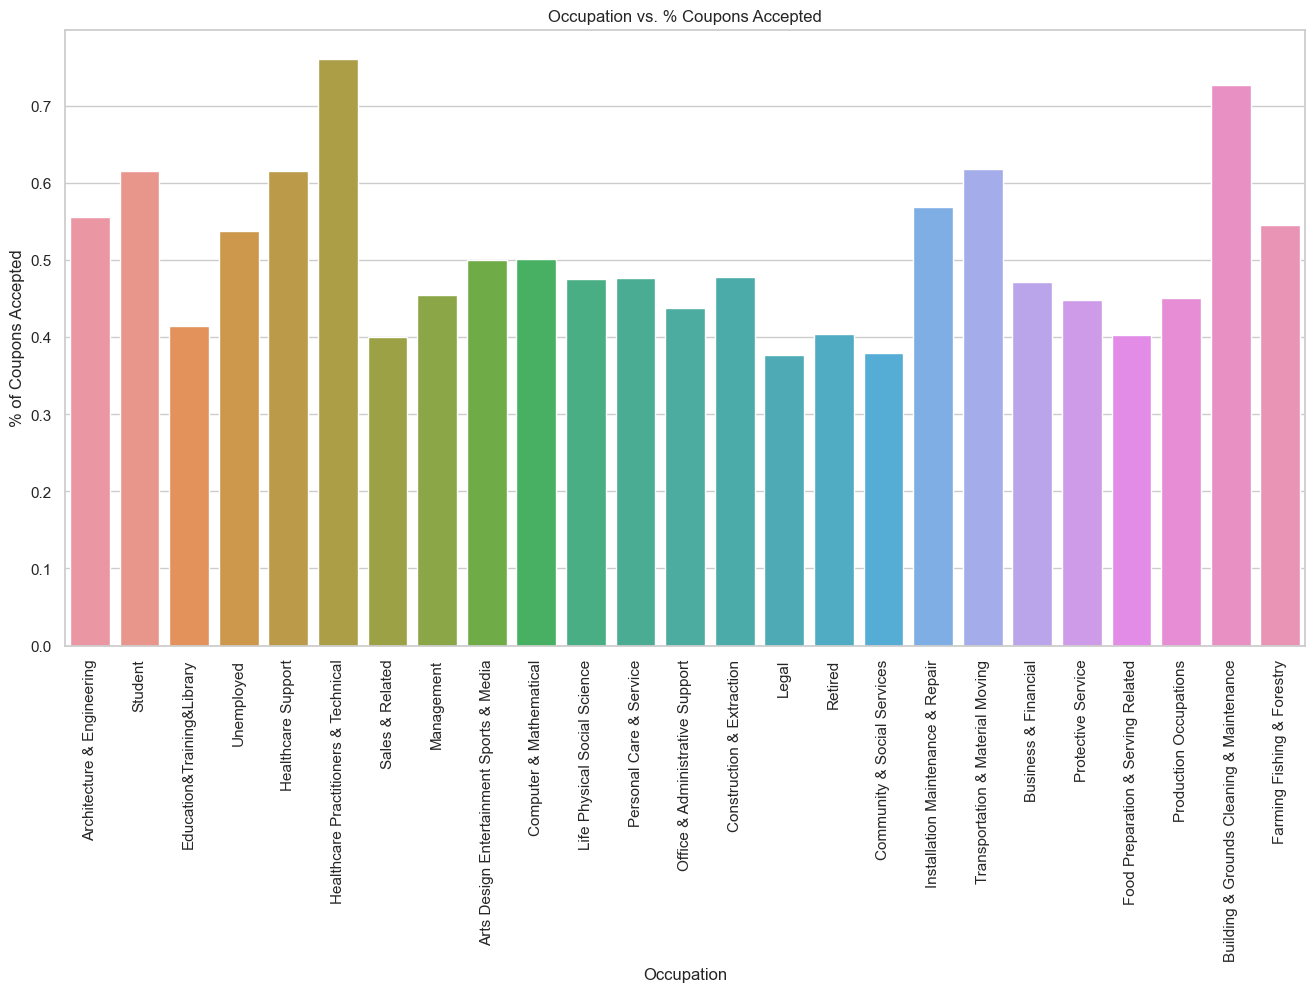

In [171]:
plt.figure(figsize = (16,8))
sns.barplot(data=data_coffee, x='occupation', y='Y', errorbar=None ).set_title('Occupation vs. % Coupons Accepted')
plt.xlabel('Occupation')
plt.ylabel('% of Coupons Accepted')
plt.xticks(rotation=90)
plt.savefig('images/occupation_coupons_accepted.png')

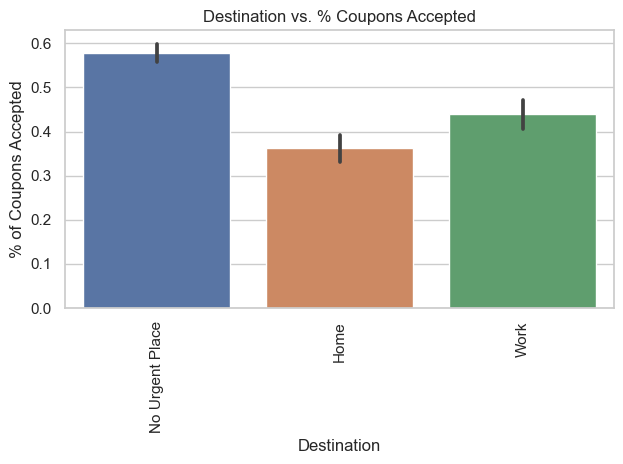

In [172]:
sns.barplot(data=data_coffee, x='destination', y='Y' ).set_title('Destination vs. % Coupons Accepted')
plt.xlabel('Destination')
plt.ylabel('% of Coupons Accepted')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('images/destination_coupons_accepted.png')

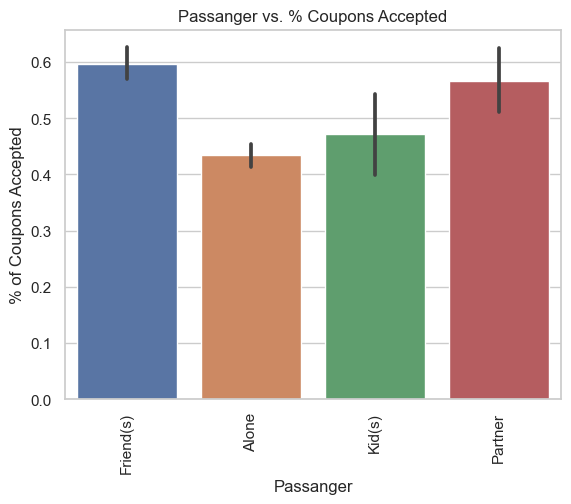

In [173]:
sns.barplot(data=data_coffee, x='passanger', y='Y' ).set_title('Passanger vs. % Coupons Accepted')
plt.xlabel('Passanger')
plt.ylabel('% of Coupons Accepted')
plt.xticks(rotation=90)
plt.savefig('images/passanger_coupons_accepted.png')

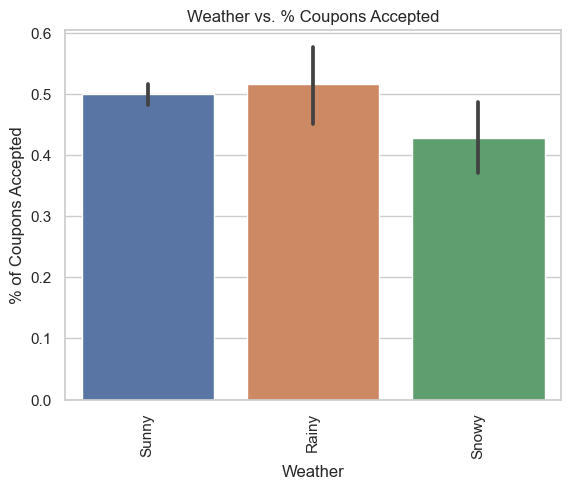

In [174]:
sns.barplot(data=data_coffee, x='weather', y='Y' ).set_title('Weather vs. % Coupons Accepted')
plt.xlabel('Weather')
plt.ylabel('% of Coupons Accepted')
plt.xticks(rotation=90)
plt.savefig('images/weather_coupons_accepted.png')

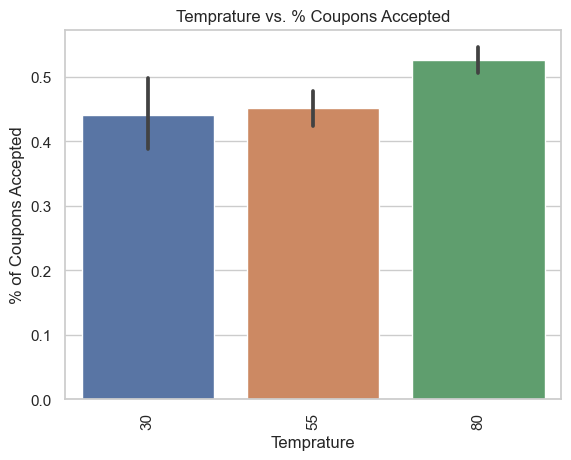

In [175]:
sns.barplot(data=data_coffee, x='temperature', y='Y' ).set_title('Temprature vs. % Coupons Accepted')
plt.xlabel('Temprature')
plt.ylabel('% of Coupons Accepted')
plt.xticks(rotation=90)
plt.savefig('images/temprature_coupons_accepted.png')

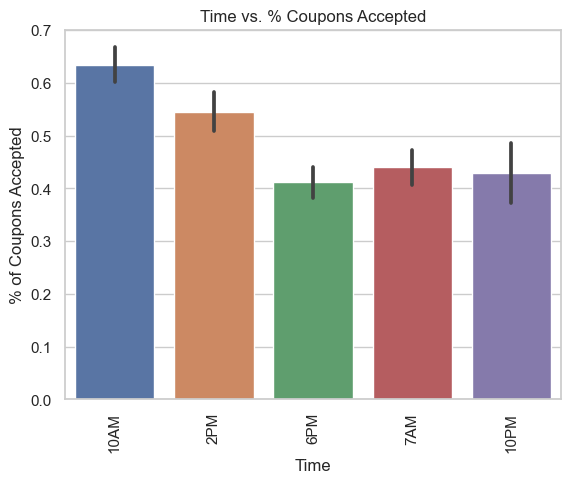

In [176]:
sns.barplot(data=data_coffee, x='time', y='Y' ).set_title('Time vs. % Coupons Accepted')
plt.xlabel('Time')
plt.ylabel('% of Coupons Accepted')
plt.xticks(rotation=90)
plt.savefig('images/time_coupons_accepted.png')

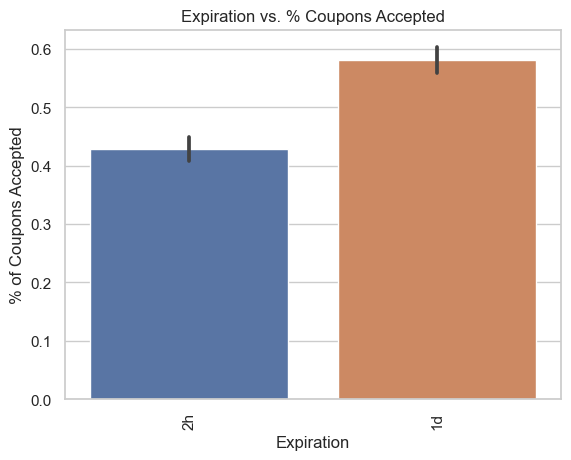

In [177]:
sns.barplot(data=data_coffee, x='expiration', y='Y' ).set_title('Expiration vs. % Coupons Accepted')
plt.xlabel('Expiration')
plt.ylabel('% of Coupons Accepted')
plt.xticks(rotation=90)
plt.savefig('images/expiration_coupons_accepted.png')

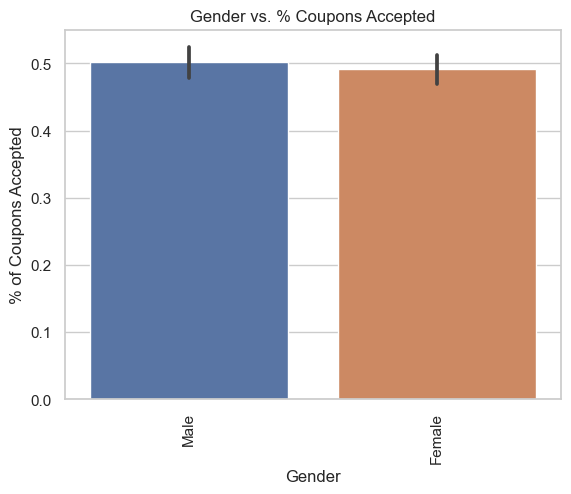

In [178]:
sns.barplot(data=data_coffee, x='gender', y='Y' ).set_title('Gender vs. % Coupons Accepted')
plt.xlabel('Gender')
plt.ylabel('% of Coupons Accepted')
plt.xticks(rotation=90)
plt.savefig('images/gender_coupons_accepted.png')

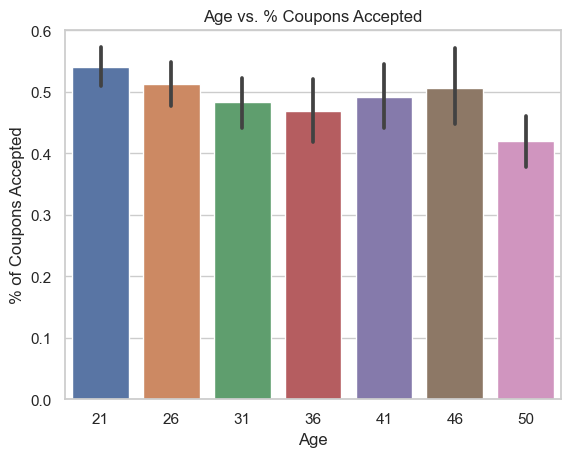

In [179]:
sns.barplot(data=data_coffee, x='age', y='Y' ).set_title('Age vs. % Coupons Accepted')
plt.xlabel('Age')
plt.ylabel('% of Coupons Accepted')
plt.savefig('images/age_coupons_accepted.png')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Single'),
  Text(1, 0, 'Married partner'),
  Text(2, 0, 'Unmarried partner'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Widowed')])

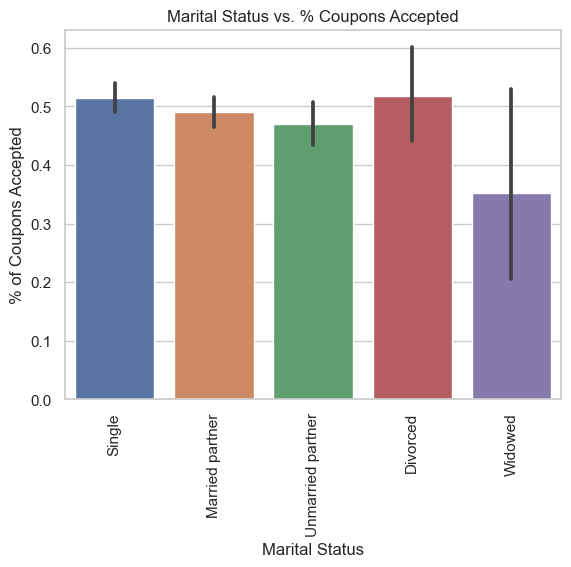

In [180]:
sns.barplot(data=data_coffee, x='maritalStatus', y='Y' ).set_title('Marital Status vs. % Coupons Accepted')
plt.xlabel('Marital Status')
plt.ylabel('% of Coupons Accepted')
plt.xticks(rotation=90)
plt.savefig('images/maritalStatus_coupons_accepted.png')
plt.xticks(rotation=90)

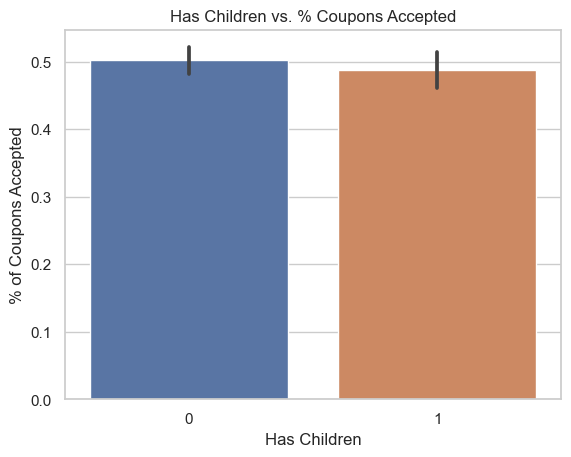

In [181]:
sns.barplot(data=data_coffee, x='has_children', y='Y' ).set_title('Has Children vs. % Coupons Accepted')
plt.xlabel('Has Children')
plt.ylabel('% of Coupons Accepted')
plt.savefig('images/hasChildren_coupons_accepted.png')

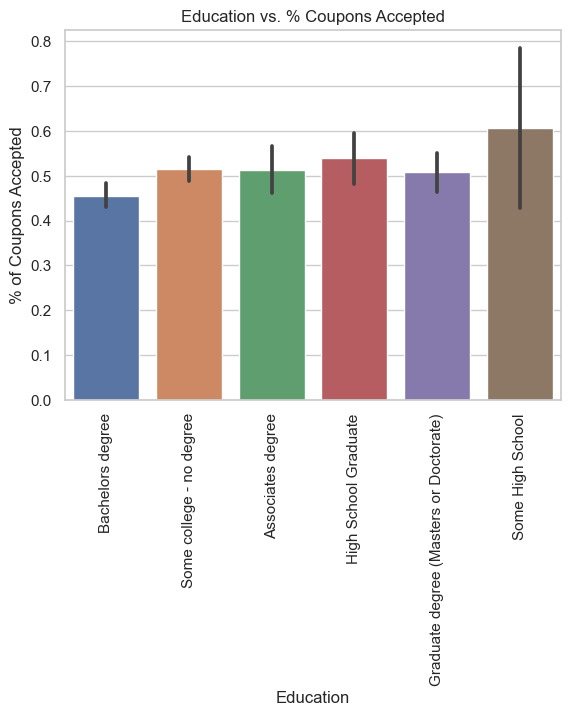

In [182]:
sns.barplot(data=data_coffee, x='education', y='Y' ).set_title('Education vs. % Coupons Accepted')
plt.xlabel('Education')
plt.ylabel('% of Coupons Accepted')
plt.xticks(rotation=90)
plt.savefig('images/education_coupons_accepted.png')

In [183]:
data_summary = pd.DataFrame(columns=['Group', 'In Group', 'Accepted'])

#define flag
in_group = (data_coffee['CoffeeHouse'] >= 3)

#insert flag to the copy of the data frame
data_coffee2 = data_coffee.copy()
data_coffee2.insert(0, 'In Group', in_group)

#compare accepted ones of the filter to everything else


accepted = data_coffee2.groupby('In Group')[['Y']].mean()
accepted = accepted.rename(columns={'Y':'Accepted'})
accepted['Group'] = 'Group 1'
accepted = accepted.reset_index()

data_summary['In Group'] = data_summary['In Group'].astype('boolean')
data_summary = pd.concat([data_summary, accepted])
data_summary

,Group,In Group,Accepted
0,Group 1,False,0.340349
1,Group 1,True,0.658994


In [184]:
in_group = (data_coffee['CoffeeHouse'] >= 3) & ~(data_coffee['destination'] == 'Home')

data_coffee2 = data_coffee.copy()
data_coffee2.insert(0, 'In Group', in_group)

accepted = data_coffee2.groupby('In Group')[['Y']].mean()
accepted = accepted.rename(columns={'Y':'Accepted'})
accepted['Group'] = 'Group 2'
accepted = accepted.reset_index()

data_summary['In Group'] = data_summary['In Group'].astype('boolean')
data_summary = pd.concat([data_summary, accepted])
data_summary


,Group,In Group,Accepted
0,Group 1,False,0.340349
1,Group 1,True,0.658994
0,Group 2,False,0.376574
1,Group 2,True,0.695258


In [185]:
in_group = (data_coffee['CoffeeHouse'] >= 3) & ~(data_coffee['destination'] == 'Home') & (data_coffee['passanger'].isin(['Friends', 'Partner']))

data_coffee2 = data_coffee.copy()
data_coffee2.insert(0, 'In Group', in_group)

accepted = data_coffee2.groupby('In Group')[['Y']].mean()
accepted = accepted.rename(columns={'Y':'Accepted'})
accepted['Group'] = 'Group 3'
accepted = accepted.reset_index()

data_summary['In Group'] = data_summary['In Group'].astype('boolean')
data_summary = pd.concat([data_summary, accepted])
data_summary

,Group,In Group,Accepted
0,Group 1,False,0.340349
1,Group 1,True,0.658994
0,Group 2,False,0.376574
1,Group 2,True,0.695258
0,Group 3,False,0.488572
1,Group 3,True,0.793814


In [186]:
in_group = (data_coffee['CoffeeHouse'] >= 3) & ~(data_coffee['destination'] == 'Home') & \
(data_coffee['passanger'].isin(['Friends', 'Partner'])) & ~(data_coffee['weather'].isin(['Snowy']))

data_coffee2 = data_coffee.copy()
data_coffee2.insert(0, 'In Group', in_group)

accepted = data_coffee2.groupby('In Group')[['Y']].mean()
accepted = accepted.rename(columns={'Y':'Accepted'})
accepted['Group'] = 'Group 4'
accepted = accepted.reset_index()

data_summary['In Group'] = data_summary['In Group'].astype('boolean')
data_summary = pd.concat([data_summary, accepted])
data_summary

,Group,In Group,Accepted
0,Group 1,False,0.340349
1,Group 1,True,0.658994
0,Group 2,False,0.376574
1,Group 2,True,0.695258
0,Group 3,False,0.488572
1,Group 3,True,0.793814
0,Group 4,False,0.488478
1,Group 4,True,0.845238


In [187]:
in_group = (data_coffee['CoffeeHouse'] >= 3) & ~(data_coffee['destination'] == 'Home') & \
(data_coffee['passanger'].isin(['Friends', 'Partner'])) & ~(data_coffee['weather'].isin(['Snowy'])) & \
(data_coffee['time'] == '10AM')

data_coffee2 = data_coffee.copy()
data_coffee2.insert(0, 'In Group', in_group)

accepted = data_coffee2.groupby('In Group')[['Y']].mean()
accepted = accepted.rename(columns={'Y':'Accepted'})
accepted['Group'] = 'Group 5'
accepted = accepted.reset_index()

data_summary['In Group'] = data_summary['In Group'].astype('boolean')
data_summary = pd.concat([data_summary, accepted])
data_summary

,Group,In Group,Accepted
0,Group 1,False,0.340349
1,Group 1,True,0.658994
0,Group 2,False,0.376574
1,Group 2,True,0.695258
0,Group 3,False,0.488572
1,Group 3,True,0.793814
0,Group 4,False,0.488478
1,Group 4,True,0.845238
0,Group 5,False,0.489731
1,Group 5,True,0.865672


In [188]:
in_group = (data_coffee['CoffeeHouse'] >= 3) & ~(data_coffee['destination'] == 'Home') & \
(data_coffee['passanger'].isin(['Friends', 'Partner'])) & ~(data_coffee['weather'].isin(['Snowy'])) & \
(data_coffee['time'] == '10AM') & (data_coffee['expiration'] == '2h')
#although 1d has higher mean for the overall dataset, in this one, 2h has a much larger mean


data_coffee2 = data_coffee.copy()
data_coffee2.insert(0, 'In Group', in_group)

accepted = data_coffee2.groupby('In Group')[['Y']].mean()
accepted = accepted.rename(columns={'Y':'Accepted'})
accepted['Group'] = 'Group 6'
accepted = accepted.reset_index()

data_summary['In Group'] = data_summary['In Group'].astype('boolean')
data_summary = pd.concat([data_summary, accepted])
data_summary

,Group,In Group,Accepted
0,Group 1,False,0.340349
1,Group 1,True,0.658994
0,Group 2,False,0.376574
1,Group 2,True,0.695258
0,Group 3,False,0.488572
1,Group 3,True,0.793814
0,Group 4,False,0.488478
1,Group 4,True,0.845238
0,Group 5,False,0.489731
1,Group 5,True,0.865672


In [189]:
in_group = (data_coffee['CoffeeHouse'] >= 3) & ~(data_coffee['destination'] == 'Home') & \
(data_coffee['passanger'].isin(['Friends', 'Partner'])) & ~(data_coffee['weather'].isin(['Snowy'])) & \
(data_coffee['time'] == '10AM') & (data_coffee['expiration'] == '2h') & ~(data_coffee['maritalStatus'] == 'Widowed')

data_coffee2 = data_coffee.copy()
data_coffee2.insert(0, 'In Group', in_group)

accepted = data_coffee2.groupby('In Group')[['Y']].mean()
accepted = accepted.rename(columns={'Y':'Accepted'})
accepted['Group'] = 'Group 7'
accepted = accepted.reset_index()

data_summary['In Group'] = data_summary['In Group'].astype('boolean')
data_summary = pd.concat([data_summary, accepted])
data_summary

,Group,In Group,Accepted
0,Group 1,False,0.340349
1,Group 1,True,0.658994
0,Group 2,False,0.376574
1,Group 2,True,0.695258
0,Group 3,False,0.488572
1,Group 3,True,0.793814
0,Group 4,False,0.488478
1,Group 4,True,0.845238
0,Group 5,False,0.489731
1,Group 5,True,0.865672


In [190]:
in_group = (data_coffee['CoffeeHouse'] >= 3) & ~(data_coffee['destination'] == 'Home') & \
(data_coffee['passanger'].isin(['Friends', 'Partner'])) & ~(data_coffee['weather'].isin(['Snowy'])) & \
(data_coffee['time'] == '10AM') & (data_coffee['expiration'] == '2h') & ~(data_coffee['maritalStatus'] == 'Widowed') &\
~(data_coffee['occupation'].isin(['Education&Training&Library', 'Sales & Related', 'Legal', 'Retired', 'Community & Social Services', 'Food Preparation & Serving Related']))

data_coffee2 = data_coffee.copy()
data_coffee2.insert(0, 'In Group', in_group)

accepted = data_coffee2.groupby('In Group')[['Y']].mean()
accepted = accepted.rename(columns={'Y':'Accepted'})
accepted['Group'] = 'Group 8'
accepted = accepted.reset_index()

data_summary['In Group'] = data_summary['In Group'].astype('boolean')
data_summary = pd.concat([data_summary, accepted])
data_summary

,Group,In Group,Accepted
0,Group 1,False,0.340349
1,Group 1,True,0.658994
0,Group 2,False,0.376574
1,Group 2,True,0.695258
0,Group 3,False,0.488572
1,Group 3,True,0.793814
0,Group 4,False,0.488478
1,Group 4,True,0.845238
0,Group 5,False,0.489731
1,Group 5,True,0.865672


In [191]:
data_summary = data_summary.reset_index(drop=True)
data_summary

,Group,In Group,Accepted
0,Group 1,False,0.340349
1,Group 1,True,0.658994
2,Group 2,False,0.376574
3,Group 2,True,0.695258
4,Group 3,False,0.488572
5,Group 3,True,0.793814
6,Group 4,False,0.488478
7,Group 4,True,0.845238
8,Group 5,False,0.489731
9,Group 5,True,0.865672


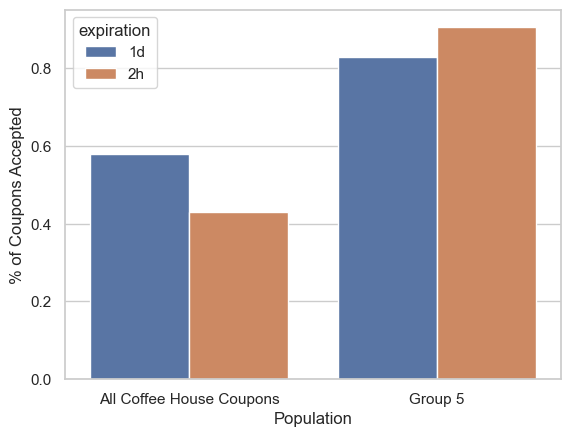

In [192]:
#Acceptance rate of expiration in general population vs. specific population
in_group = (data_coffee['CoffeeHouse'] >= 3) & ~(data_coffee['destination'] == 'Home') & \
(data_coffee['passanger'].isin(['Friends', 'Partner'])) & ~(data_coffee['weather'].isin(['Snowy'])) & \
(data_coffee['time'] == '10AM') 

data_coffee2 = data_coffee.copy()
data_coffee2.insert(0, 'In_Group', in_group)

data_filtered_acceptance = data_coffee2.query('In_Group == True')
data_filtered_acceptance = data_filtered_acceptance.groupby('expiration')['Y'].mean().reset_index()
data_filtered_acceptance['Population'] = 'Group 5'

overall_acceptance = data_coffee.groupby('expiration')['Y'].mean().reset_index()
overall_acceptance['Population'] = 'All Coffee House Coupons'

acceptance = pd.concat([overall_acceptance, data_filtered_acceptance])
acceptance

sns.barplot(acceptance, x='Population', y='Y', hue='expiration')
plt.ylabel('% of Coupons Accepted')
plt.savefig('images/population_coupons_accepted.png')

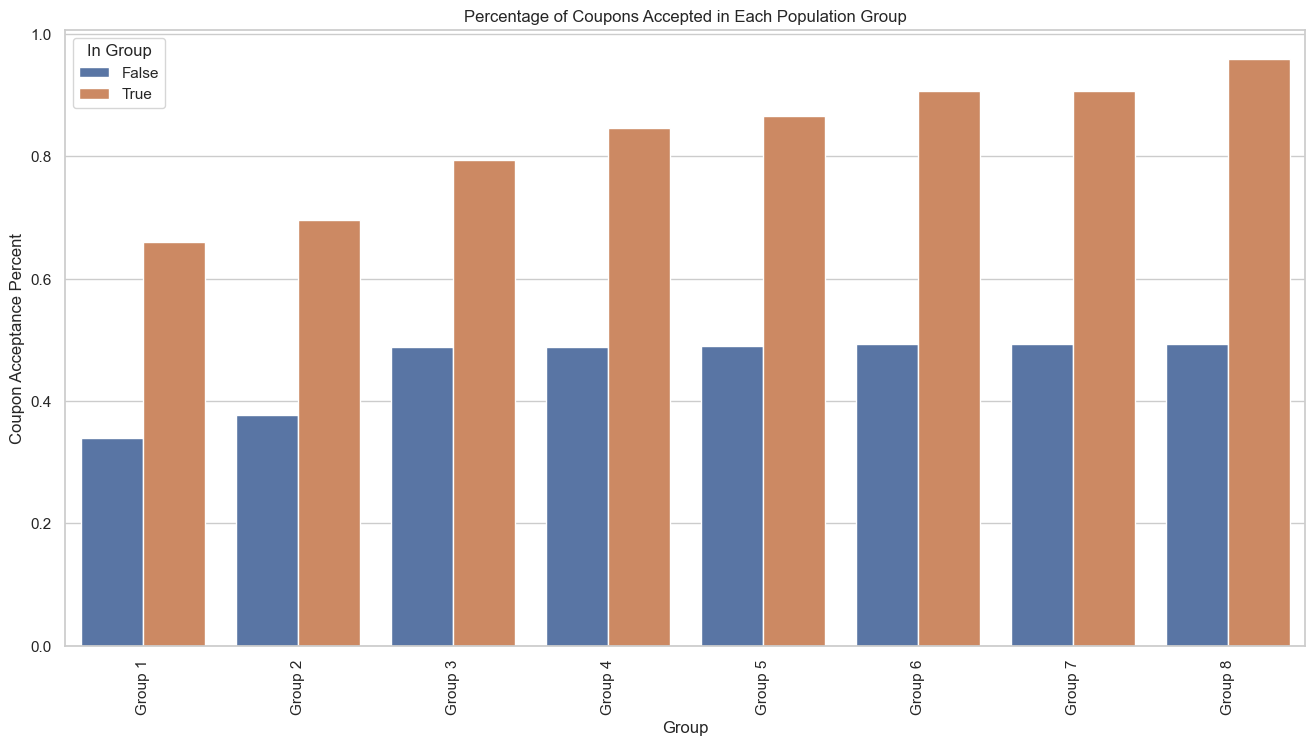

In [193]:
#plot coupon acceptance range for various populations
sns.set_theme(style="whitegrid")
plt.figure(figsize = (16,8))
sns.barplot(data=data_summary, x='Group', y='Accepted', hue='In Group').set_title('Percentage of Coupons Accepted in Each Population Group')
plt.xticks(rotation=90)
plt.xlabel('Group')
plt.ylabel('Coupon Acceptance Percent')
plt.savefig('images/coupon_acceptance_per_group.png')

In [194]:
data_coffee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3816 entries, 23 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3816 non-null   object
 1   passanger             3816 non-null   object
 2   weather               3816 non-null   object
 3   temperature           3816 non-null   int64 
 4   time                  3816 non-null   object
 5   coupon                3816 non-null   object
 6   expiration            3816 non-null   object
 7   gender                3816 non-null   object
 8   age                   3816 non-null   int64 
 9   maritalStatus         3816 non-null   object
 10  has_children          3816 non-null   int64 
 11  education             3816 non-null   object
 12  occupation            3816 non-null   object
 13  income                3816 non-null   int64 
 14  Bar                   3816 non-null   int64 
 15  CoffeeHouse           3816 non-null 

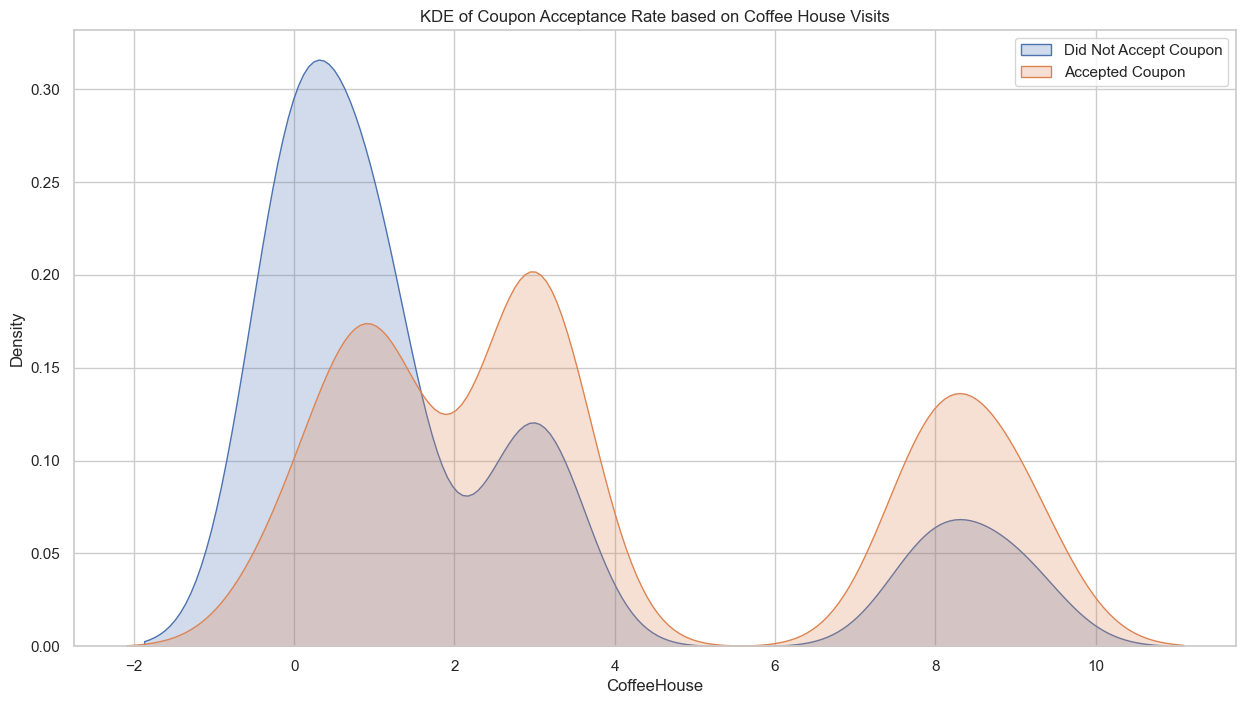

In [195]:
#although the CoffeeHouse is not a truly continuous variable in this dataset, for curiosity, below is a kdeplot of it as-if it was a continuous variable
plt.figure(figsize = (15,8))
sns.kdeplot(data_coffee['CoffeeHouse'][data_coffee.Y == 0], fill = True).set_title('KDE of Coupon Acceptance Rate based on Coffee House Visits')
sns.kdeplot(data_coffee['CoffeeHouse'][data_coffee.Y == 1], fill = True)
plt.legend(['Did Not Accept Coupon', 'Accepted Coupon'])
plt.show()

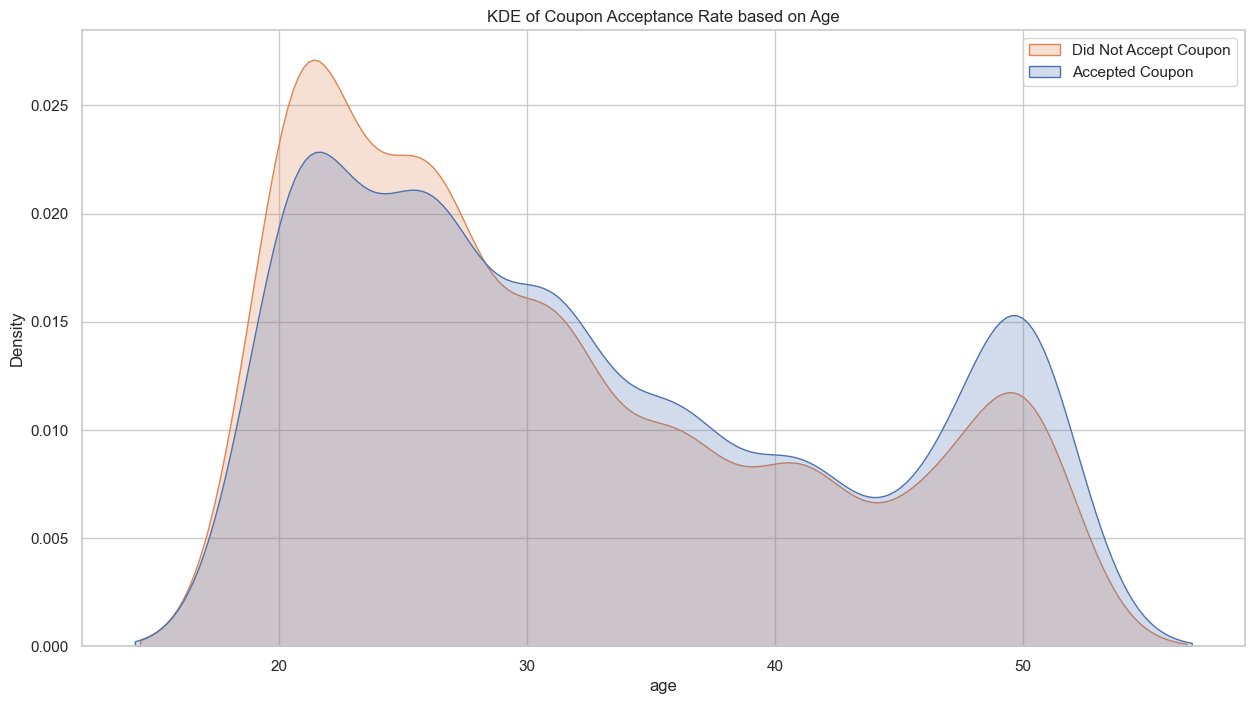

In [196]:
#although 'age' is not a truly continuous variable in this dataset, for curiosity, below is a kdeplot of it as-if it was a continuous variable

plt.figure(figsize = (15,8))
sns.kdeplot(data_coffee, x = 'age', hue='Y', fill = True).set_title('KDE of Coupon Acceptance Rate based on Age')
plt.legend(['Did Not Accept Coupon', 'Accepted Coupon'])
plt.savefig('images/age_acceptance_kde.png')

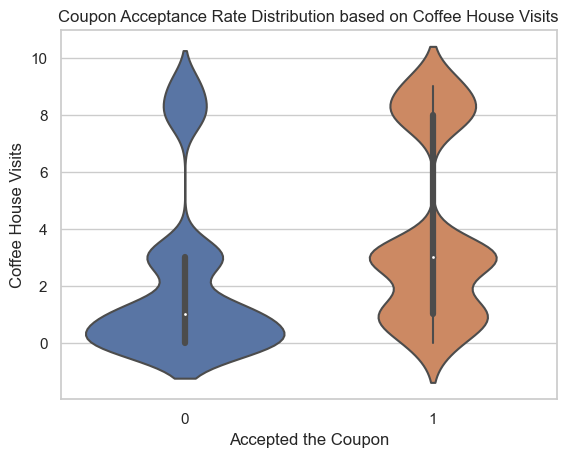

<Figure size 640x480 with 0 Axes>

In [197]:
#Violin plot to see how acceptance is distributed for Coffee House coupons by number of coffee house visits
sns.violinplot(data=data_coffee, x='Y', y='CoffeeHouse').set_title('Coupon Acceptance Rate Distribution based on Coffee House Visits')
plt.xlabel('Accepted the Coupon')
plt.ylabel('Coffee House Visits')
plt.savefig('images/coupon_acceptance_rate_violin.png')